# **MÓDULO 12 - Pratique**

Abaixo temos um dataframe com as seguintes informações:


**Nome:** O nome de cada indivíduo da base


**Idade:** A idade de cada um deles


**Profissão:** A atual ocupação


**Salário:** O salário registrado


**Limite de crédito:** O limite de crédito disponível para cada um dos indivíduos


**Historico_Inadimplencia:** Marco como 0 aqueles que nunca tiveram um histórico de inadimplência e como 1 aqueles que já tiveram em algum momento.


**Estado civil:** O estado civil de cada um deles


**Imovel_Proprio:** Marcado como 0 aqueles que não tem imóvel próprio e como 1 aqueles que tem.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 

In [2]:

data = {
    'Nome': ['Alice', 'Joao', 'Charlie', 'David', 'Eva', 'Diego', 'Denize', 'Claudio'],
    'Idade': [25, 30, 35, 40, 45, 60, 22, 24],
    'Profissão': ['Engenheiro', 'Médico', 'Professor', 'Advogado', 'Médico','Engenheiro', 'Estudante','Estudante'],
    'Salário': ['4500', '8000', '5000', '10000', '12000','15000', '1200','1500'],
    'Limite_Credito': ['2500', '4000', '4000', '1000', '10000','2000', '500','250'],
    'Historico_Inadimplencia': ['0', '0', '0', '1', '0','1', '0','1'],
    'Estado_Civil': ['Casamento', 'Casamento', 'Solteiro', 'Solteiro', 'Casamento','Solteiro', 'Solteiro','Solteiro'],
    'Imovel_Proprio': ['0', '0', '0', '1', '1','1', '0','0']
}

df = pd.DataFrame(data)
df.head(10)

,Nome,Idade,Profissão,Salário,Limite_Credito,Historico_Inadimplencia,Estado_Civil,Imovel_Proprio
0,Alice,25,Engenheiro,4500,2500,0,Casamento,0
1,Joao,30,Médico,8000,4000,0,Casamento,0
2,Charlie,35,Professor,5000,4000,0,Solteiro,0
3,David,40,Advogado,10000,1000,1,Solteiro,1
4,Eva,45,Médico,12000,10000,0,Casamento,1
5,Diego,60,Engenheiro,15000,2000,1,Solteiro,1
6,Denize,22,Estudante,1200,500,0,Solteiro,0
7,Claudio,24,Estudante,1500,250,1,Solteiro,0


A proposta da atividade é que utilizem os dados do DataFrame Data e escolham apenas 3 gráficos que ajudem vocês a identificar quais fatores são os principais impulsionadores para aqueles que tem limite de crédito alto.

Durante a exploração de vocês podem utilizar mais de 3 gráficos mas deixem na entrega final apenas os 3 mais assertivos que contenham a informação da mensagem que querem passar, fiquem livres para utilizar as bibliotecas que quiserem para os gráficos.

Justifiquem a escolha dos visuais e despertem o lado analítico de vocês com uma análise acerca do descoberto através dos gráficos. Lembrem o que aprendemos na aula, devemos ser assertivos na nossa mensagem.

## 1. Verificação Inicial

In [3]:
# Verificar os tipos de dados
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Nome                     8 non-null      object
 1   Idade                    8 non-null      int64 
 2   Profissão                8 non-null      object
 3   Salário                  8 non-null      object
 4   Limite_Credito           8 non-null      object
 5   Historico_Inadimplencia  8 non-null      object
 6   Estado_Civil             8 non-null      object
 7   Imovel_Proprio           8 non-null      object
dtypes: int64(1), object(7)
memory usage: 644.0+ bytes


In [4]:
# Conversão de colunas numéricas para garantir cálculos corretos (evitar concatenação de strings)
colunas_numericas = ['Idade','Salário','Limite_Credito','Historico_Inadimplencia','Imovel_Proprio']
df[colunas_numericas] = df[colunas_numericas].apply(pd.to_numeric, errors='coerce')

In [5]:
# Confirmar se houve as alterações
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Nome                     8 non-null      object
 1   Idade                    8 non-null      int64 
 2   Profissão                8 non-null      object
 3   Salário                  8 non-null      int64 
 4   Limite_Credito           8 non-null      int64 
 5   Historico_Inadimplencia  8 non-null      int64 
 6   Estado_Civil             8 non-null      object
 7   Imovel_Proprio           8 non-null      int64 
dtypes: int64(5), object(3)
memory usage: 644.0+ bytes


## 2.Análise dos Dados

### Quais os fatores que mais impulsiona o limite de crédito?

#### As três variáveis que mais pulsiona o limite de crédito, são:

- **Salário:** Em crédito, renda costuma ser um dos principais sinais para aumentar limite.

- **Histórico de inadimplência (0/1):** Se a pessoa já teve inadimplência, o comportamento esperado é reduzir ou segurar o limite.

- **Imóvel próprio (0/1):** Tende a aumentar limite, mesmo com salários parecidos.

#### E as outras variáveis?

- **Idade:** Pode influenciar, mas normalmente é mais depende muito do contexto.

- **Profissão:** Pode capturar faixa de renda/estabilidade, mas muitas vezes vira redundante se já tem salário.

- **Estado civil:** Costuma ser fraco.

Logo, os gráficos que melhor confirma esta análise estão a seguir.

## 3. Plotagem dos Gráficos

### 3.1 Salário x Limite de Crédito (dispersão)

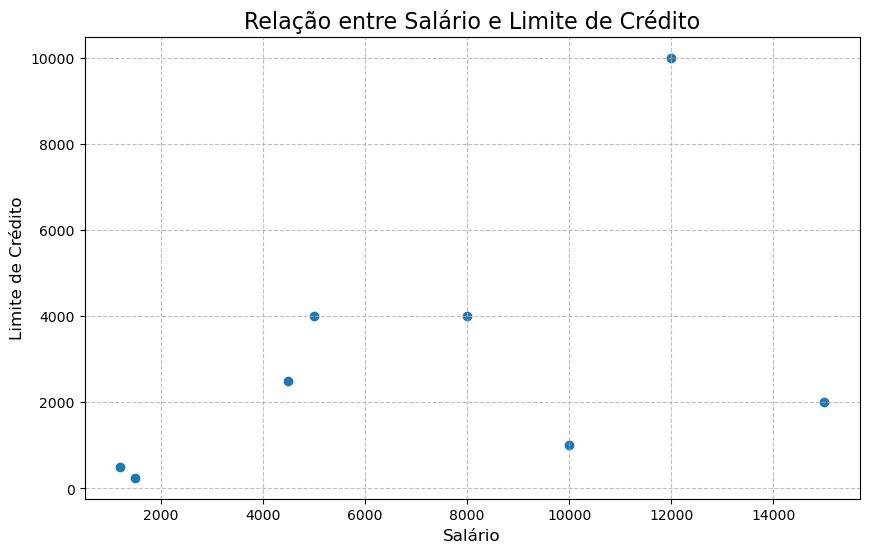

In [6]:
plt.figure(figsize=(10, 6))

plt.scatter(df['Salário'], df['Limite_Credito'])

plt.title('Relação entre Salário e Limite de Crédito', fontsize=16)
plt.xlabel('Salário', fontsize=12)
plt.ylabel('Limite de Crédito', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.8)

plt.show()

O gráfico de dispersão sugere uma tendência positiva: salários maiores tendem a estar associados a limites maiores, embora existam variações (nem todo salário alto vira limite alto na mesma proporção, pois podem existir outros fatores que podem contribuir para o aumento de limite de crédito).

### 3.2 Histórico de Inadimplência x Limite de Crédito (barras)

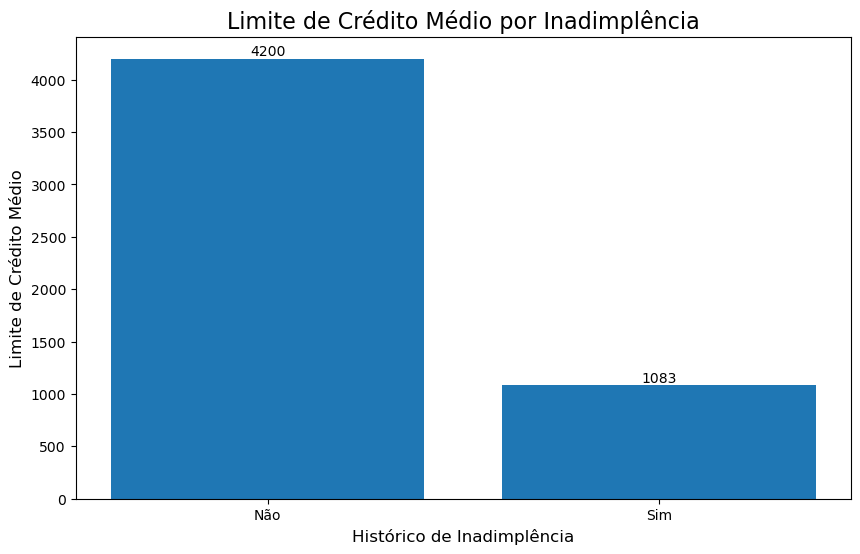

In [7]:
plt.figure(figsize=(10,6))

media_limite_por_inadimplencia = df.groupby('Historico_Inadimplencia')['Limite_Credito'].mean()

plt.bar(media_limite_por_inadimplencia.index, media_limite_por_inadimplencia.values)

for i, v in enumerate(media_limite_por_inadimplencia.values):
    plt.text(i, v, f'{v:.0f}', ha='center', va='bottom')
    

plt.title('Limite de Crédito Médio por Inadimplência', fontsize=16)
plt.xlabel('Histórico de Inadimplência', fontsize=12)
plt.ylabel('Limite de Crédito Médio', fontsize=12)

plt.xticks([0, 1], ['Não', 'Sim'])

plt.show()

Ao comparar os grupos, observamos que pessoas sem inadimplência (0) apresentam limite médio significativamente maior do que as com inadimplência (1), indicando que a inadimplência reduz o limite concedido.

### 3.3 Imóvel Próprio x Limite de Crédito (barras)

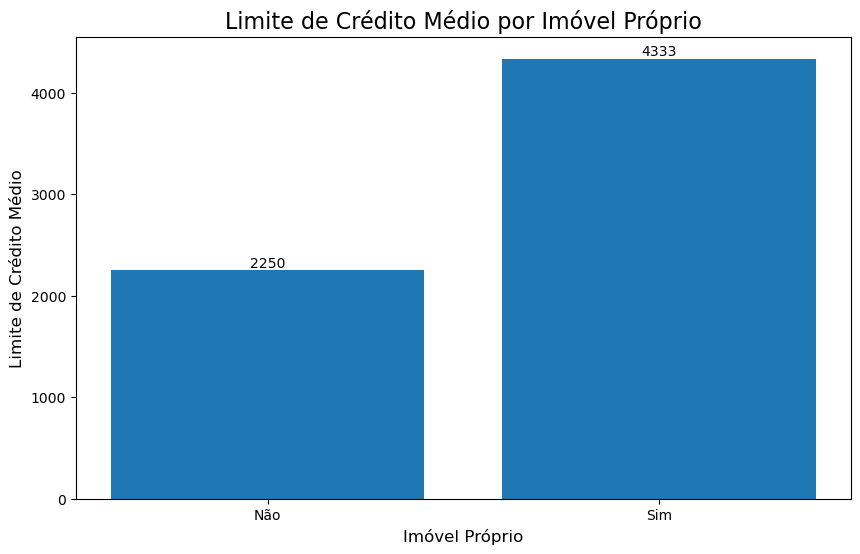

In [8]:
media_limite_por_imovel_proprio = df.groupby('Imovel_Proprio')['Limite_Credito'].mean()

plt.figure(figsize=(10,6))
plt.bar(media_limite_por_imovel_proprio.index, media_limite_por_imovel_proprio.values)

for i, v in enumerate(media_limite_por_imovel_proprio.values):
    plt.text(i, v, f'{v:.0f}', ha='center', va='bottom')

plt.title('Limite de Crédito Médio por Imóvel Próprio', fontsize=16)
plt.xlabel('Imóvel Próprio', fontsize=12)
plt.ylabel('Limite de Crédito Médio', fontsize=12)

plt.xticks([0, 1], ['Não', 'Sim'])

plt.show()

O grupo com imóvel próprio (1) apresenta limite médio maior do que o grupo sem imóvel (0), sugerindo que patrimônio pode contribuir para limites mais altos.

## 4. Conclusão

Os gráficos sugerem associação positiva entre salário e limite. Além disso, inadimplência está ligada a limites médios menores, enquanto imóvel próprio se associa a limites médios maiores. Como a amostra é pequena, os resultados são indicativos.